In [1]:
from utils.model_utils import Model_utils 
from utils.preprocess import LoadData 
import pandas as pd

## XGboost

In [2]:
load_data = LoadData()
model_utils = Model_utils()

# load the test data
test_data = load_data.last_month_data
data_last_7_days = load_data.data.tail(7)

# Union the last 7 days data with the last month data
test_data = pd.concat([data_last_7_days,test_data], ignore_index=True)


# lag feature and create a dataframe to each model
lag_columns_list = ['medio_diario']*7
lag_values = [1, 2, 3, 4, 5, 6, 7]

test_data = load_data.create_lag_columns(test_data, lag_columns_list, lag_values)

# removing the first 7 rows
test_data = test_data.iloc[7:]

In [3]:
# load the model and the preprocessor
model_name = 'xgboost'
model_date = '2024-06-26_21-06-25'#'2024-06-19_18-13-44'
model_path=f'models/{model_name}__{model_date}.pkl'
preprocessor_path = f'models/preprocessors/{model_name}__{model_date}_preprocessor.pkl'


model, preprocessor = model_utils.load_model(model_path=model_path, preprocessor_path=preprocessor_path)

In [4]:
X_test = test_data[load_data.features]
y_test = test_data[load_data.target]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [5]:
# Preprocess the data
X_test = preprocessor.transform(X_test)

In [6]:
y_pred = model.predict(X_test)

/home/kr0pt/Documents/venv/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [13:32:57] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


MAE:  0.11366590623910071
MSE:  0.025032011624542865
RMSE: 0.15821508026905295
R2:   0.7152849392577192


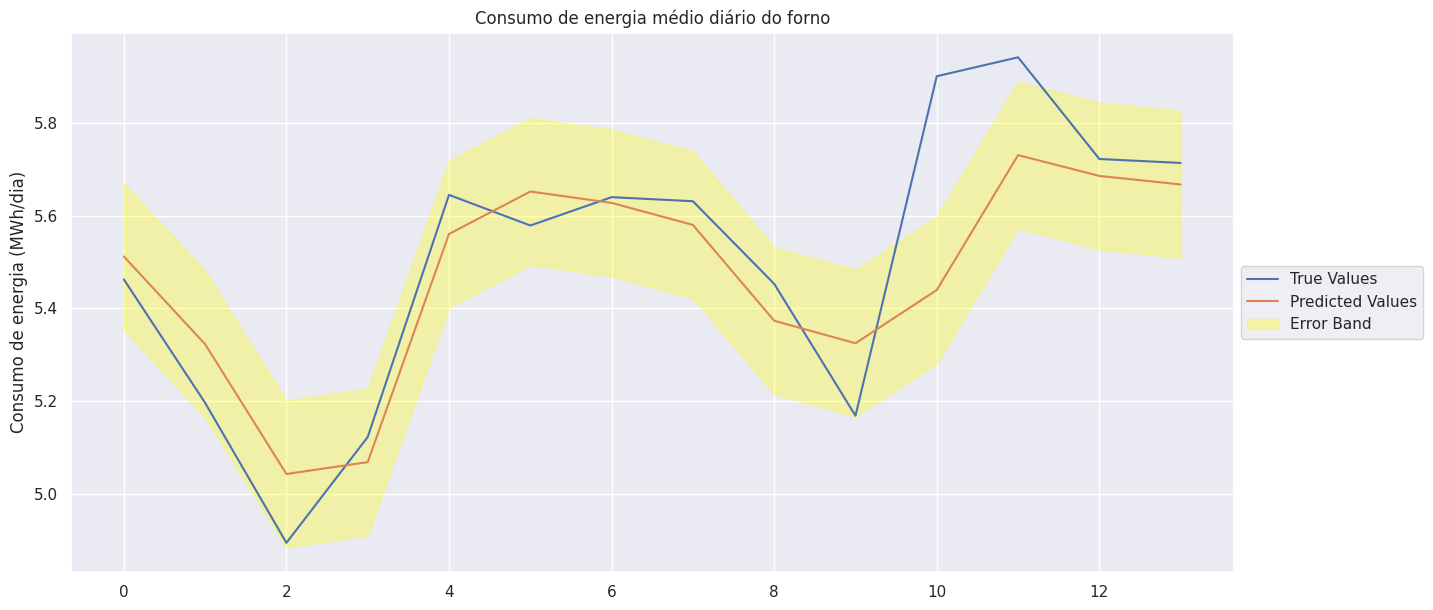

In [7]:
model_utils.plot_predictions(X_test, y_test, model_name+'__'+model_date)

## KNN

In [8]:
load_data = LoadData()
model_utils = Model_utils()

# load the test data
test_data = load_data.last_month_data
data_last_7_days = load_data.data.tail(7)

# Union the last 7 days data with the last month data
test_data = pd.concat([data_last_7_days,test_data], ignore_index=True)


# lag feature and create a dataframe to each model
lag_columns_list = ['medio_diario']*7
lag_values = [1, 2, 3, 4, 5, 6, 7]
lag_columns_list += load_data.features
lag_values += [1]*len(load_data.features)

test_data = load_data.create_lag_columns(test_data, lag_columns_list, lag_values)

# removing the first 7 rows
test_data = test_data.iloc[7:]

In [9]:
# load the model and the preprocessor
model_name = 'KNN'
model_date = '2024-06-27_13-41-11'
model_path=f'models/{model_name}__{model_date}.pkl'
preprocessor_path = f'models/preprocessors/{model_name}__{model_date}_preprocessor.pkl'


model, preprocessor = model_utils.load_model(model_path=model_path, preprocessor_path=preprocessor_path)

In [10]:
# Only to obtain the test data
X_test = test_data[load_data.features]
y_test = test_data[load_data.target]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [11]:
# Preprocess the data
X_test = preprocessor.transform(X_test)

In [12]:
y_pred = model.predict(X_test)

MAE:  0.08905259307500746
MSE:  0.024250065675342686
RMSE: 0.15572432589464846
R2:   0.724178822488639


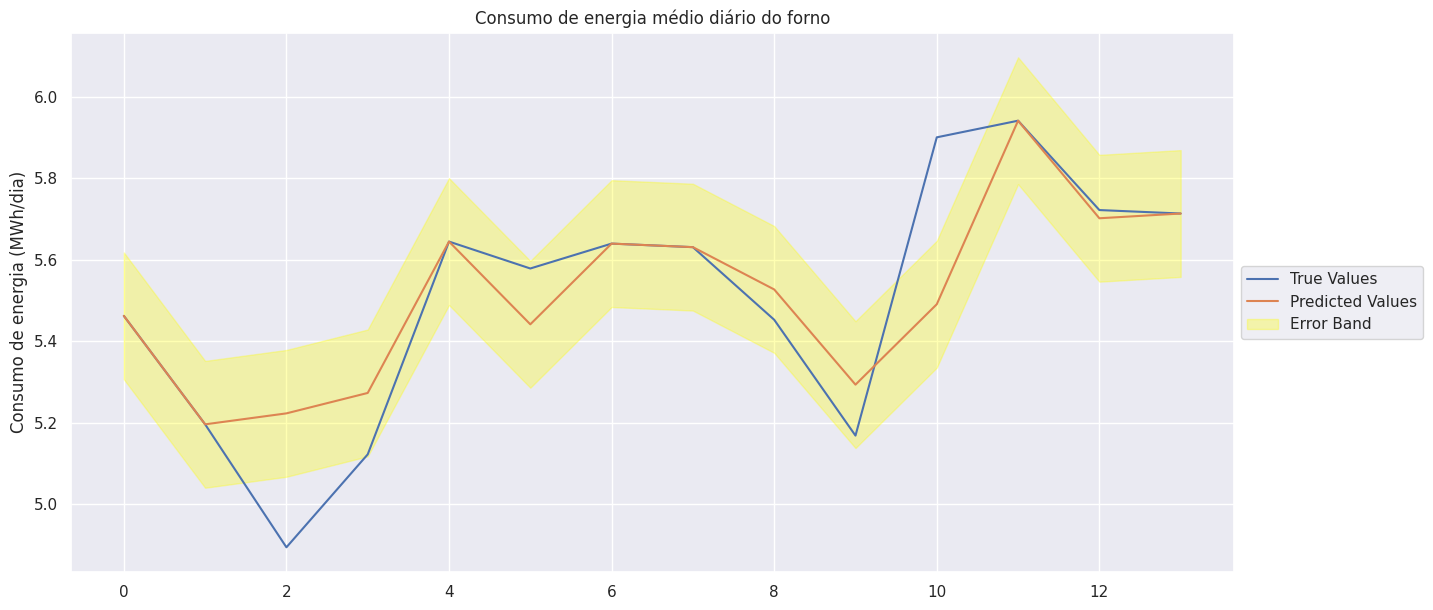

In [13]:
model_utils.plot_predictions(X_test, y_test, model_name+'__'+model_date)

## Random Forest

In [20]:
load_data = LoadData()
model_utils = Model_utils()

# load the test data
test_data = load_data.last_month_data
data_last_7_days = load_data.data.tail(7)

# Union the last 7 days data with the last month data
test_data = pd.concat([data_last_7_days,test_data], ignore_index=True)


# lag feature and create a dataframe to each model
lag_columns_list = ['medio_diario']*7
lag_values = [1, 2, 3, 4, 5, 6, 7]

test_data = load_data.create_lag_columns(test_data, lag_columns_list, lag_values)

# removing the first 7 rows
test_data = test_data.iloc[7:]

In [22]:
# load the model and the preprocessor
model_name = 'Random_Forest'
model_date = '2024-06-26_21-15-21'
model_path=f'models/{model_name}__{model_date}.pkl'
preprocessor_path = f'models/preprocessors/{model_name}__{model_date}_preprocessor.pkl'


model, preprocessor = model_utils.load_model(model_path=model_path, preprocessor_path=preprocessor_path)

In [23]:
# Only to obtain the test data
X_test = test_data[load_data.features]
y_test = test_data[load_data.target]

In [24]:
# Preprocess the data
X_test = preprocessor.transform(X_test)

MAE:  0.3065661919369244
MSE:  0.1337714827592434
RMSE: 0.36574784040270614
R2:   -0.5215219779636262


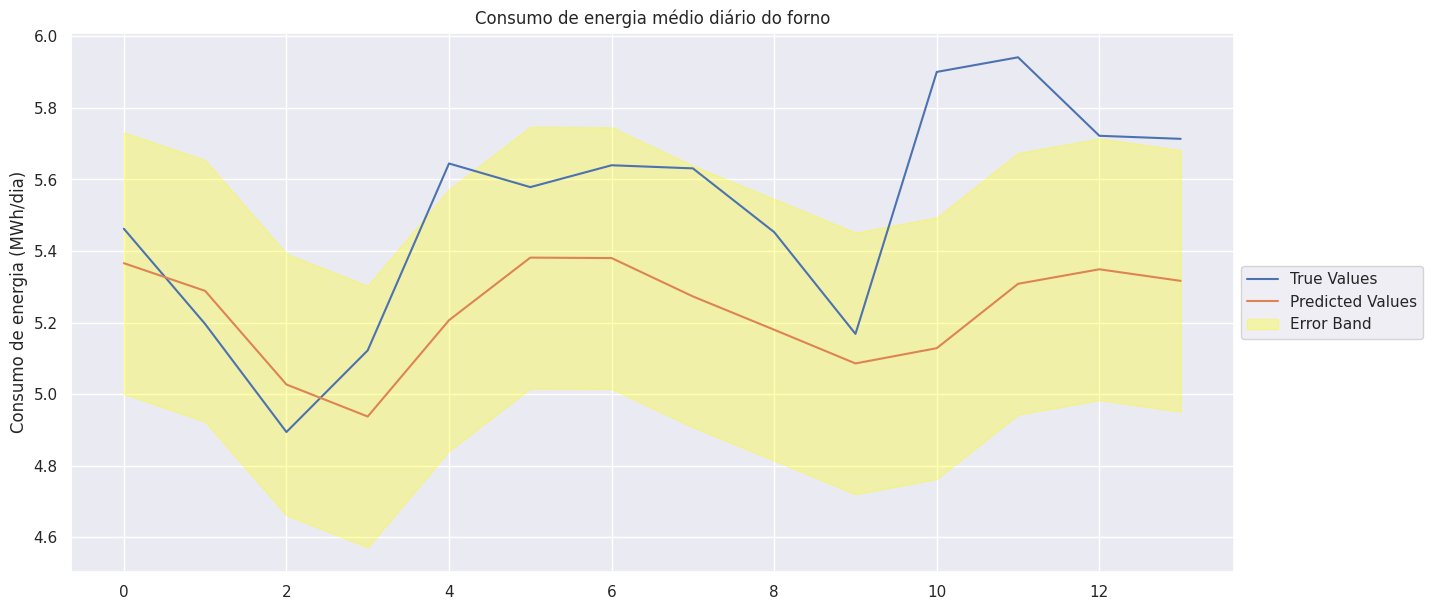

In [25]:
model_utils.plot_predictions(X_test, y_test, model_name+'__'+model_date)